# Stock Price Prediction

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM,Dense,Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.dates as mdates
from sklearn import linear_model


# Reading data and see if the data is clean
As it is timeseries data so we have to read the data by parsing date means making data column as index.

In [367]:
table_initial = pd.read_csv("TESLA.csv",na_values=['null'],index_col='Date',parse_dates=True,infer_datetime_format=True)

In [368]:
table_initial.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,23.889999
2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,21.959999
2010-07-02,23.000000,23.10,18.709999,19.200001,5139800,19.200001
2010-07-06,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [369]:
table_initial.shape

(1692, 6)

In [370]:
table_initial.describe()

,Open,High,Low,Close,Volume,Adj Close
count,1692.000000,1692.000000,1692.000000,1692.000000,1.692000e+03,1692.000000
mean,132.441572,134.769698,129.996223,132.428658,4.270741e+06,132.428658
std,94.309923,95.694914,92.855227,94.313187,4.295971e+06,94.313187
min,16.139999,16.629999,14.980000,15.800000,1.185000e+05,15.800000
25%,30.000000,30.650000,29.215000,29.884999,1.194350e+06,29.884999
50%,156.334999,162.370002,153.150002,158.160004,3.180700e+06,158.160004
75%,220.557495,224.099999,217.119999,220.022503,5.662100e+06,220.022503
max,287.670013,291.420013,280.399994,286.040009,3.716390e+07,286.040009


In [371]:
table_initial.isnull().values.any()

False

<AxesSubplot:xlabel='Date'>

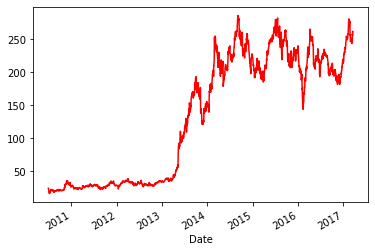

In [401]:
table_initial['Adj Close'].plot(color='red')

# Correlation Analysis

In [373]:
X=table_inital.drop(['Adj Close'],axis=1)
X=X.drop(['Close'],axis=1)

<AxesSubplot:title={'center':'Correlation Bar Graph with Adj Close and (Open, High and Low)'}>

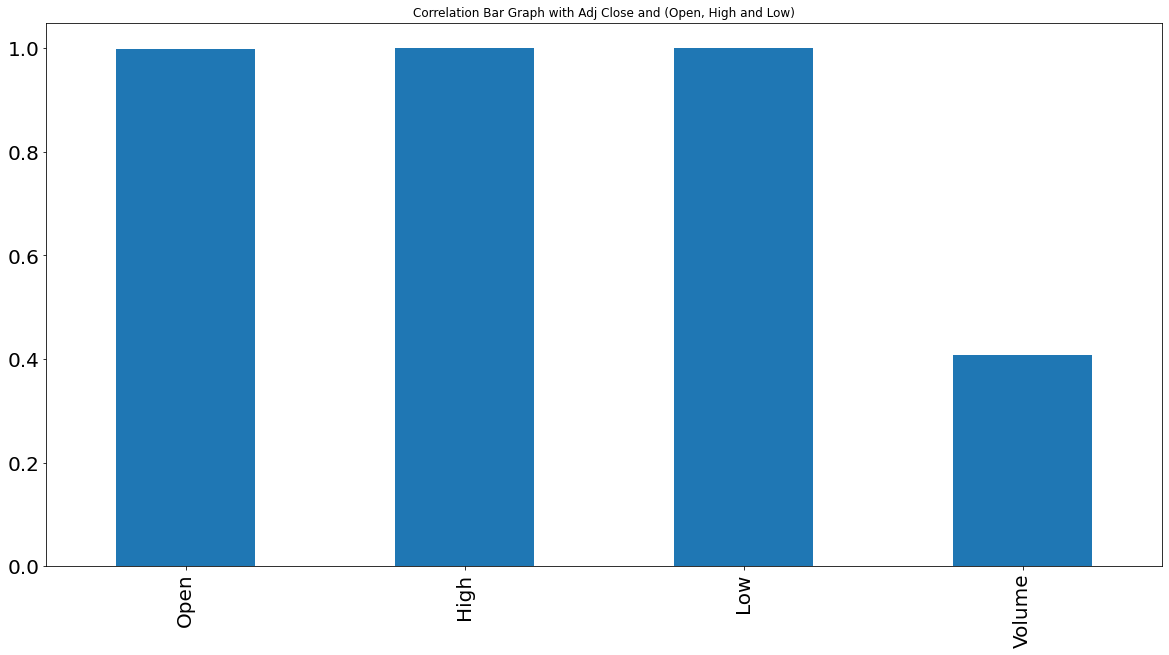

In [417]:
X.corrwith(table_initial['Adj Close']).plot.bar(
        figsize = (20, 10), title = "Correlation Bar Graph with Adj Close and (Open, High and Low)", fontsize = 20,
        rot = 90, grid = False)

In [375]:
test = table_initial
# Target column
target_adj_close = pd.DataFrame(test['Adj Close'])
display(test.head())

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,23.889999
2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,21.959999
2010-07-02,23.000000,23.10,18.709999,19.200001,5139800,19.200001
2010-07-06,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [346]:
# selecting Feature Columns
feature_columns = ['Open', 'High', 'Low', 'Volume']

# Normalizing the data

In [347]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
feature_minmax_transform_data = scaler.fit_transform(test[feature_columns])
feature_minmax_transform = pd.DataFrame(columns=feature_columns, data=feature_minmax_transform_data, index=test.index)
feature_minmax_transform.head()

,Open,High,Low,Volume
Date,,,,
2010-06-29,0.010533,0.030460,0.009645,0.503377
2010-06-30,0.035539,0.050184,0.031347,0.460748
2010-07-01,0.032630,0.033808,0.019931,0.218659
2010-07-02,0.025264,0.023545,0.014053,0.135544
2010-07-06,0.014216,0.012264,0.003202,0.182166


In [348]:
display(feature_minmax_transform.head())
print('Shape of features : ', feature_minmax_transform.shape)
print('Shape of target : ', target_adj_close.shape)

# Shift target array because we want to predict the n + 1 day value


target_adj_close = target_adj_close.shift(-1)
validation_y = target_adj_close[-90:-1]
target_adj_close = target_adj_close[:-90]

# Taking last 90 rows of data to be validation set
validation_X = feature_minmax_transform[-90:-1]
feature_minmax_transform = feature_minmax_transform[:-90]
display(validation_X.tail())
display(validation_y.tail())

print("\n -----After process------ \n")
print('Shape of features : ', feature_minmax_transform.shape)
print('Shape of target : ', target_adj_close.shape)
display(target_adj_close.tail())

,Open,High,Low,Volume
Date,,,,
2010-06-29,0.010533,0.030460,0.009645,0.503377
2010-06-30,0.035539,0.050184,0.031347,0.460748
2010-07-01,0.032630,0.033808,0.019931,0.218659
2010-07-02,0.025264,0.023545,0.014053,0.135544
2010-07-06,0.014216,0.012264,0.003202,0.182166


Shape of features :  (1692, 4)
Shape of target :  (1692, 1)


,Open,High,Low,Volume
Date,,,,
2017-03-10,0.847310,0.836530,0.859091,0.079322
2017-03-13,0.842191,0.837803,0.858262,0.078072
2017-03-14,0.846941,0.878816,0.870469,0.201294
2017-03-15,0.887047,0.889297,0.901552,0.126820
2017-03-16,0.906935,0.906583,0.919599,0.188469


,Adj Close
Date,
2017-03-10,246.169998
2017-03-13,258.000000
2017-03-14,255.729996
2017-03-15,262.049988
2017-03-16,261.500000



 -----After process------ 

Shape of features :  (1602, 4)
Shape of target :  (1602, 1)


,Adj Close
Date,
2016-10-31,190.789993
2016-11-01,188.020004
2016-11-02,187.419998
2016-11-03,190.559998
2016-11-04,193.210007


# Train test Split using Timeseriessplit

In [349]:
ts_split= TimeSeriesSplit(n_splits=10)
for train_index, test_index in ts_split.split(feature_minmax_transform):
        X_train, X_test = feature_minmax_transform[:len(train_index)], feature_minmax_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = target_adj_close[:len(train_index)].values.ravel(), target_adj_close[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [350]:
X_train.shape

(1457, 4)

In [351]:
X_test.shape

(145, 4)

In [352]:
y_train.shape

(1457,)

In [353]:
y_test.shape

(145,)

In [415]:
def validate_result(model, model_name):
    predicted = model.predict(validation_X)
    RSME_score = np.sqrt(mean_squared_error(validation_y, predicted))
    print('RMSE: ', RSME_score)
    
    R2_score = r2_score(validation_y, predicted)
    print('R2 score: ', R2_score)

    plt.plot(validation_y.index, predicted,'r', label='Predict', color='orange')
    plt.plot(validation_y.index, validation_y,'b', label='Actual', color='blue')
    plt.ylabel('Price')
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.title(model_name + ' Predict vs Actual')
    plt.legend(loc='upper right')
    plt.show()

# Benchmark Model

RMSE:  8.98541080906722
R2 score:  0.9133516671221169


C:\Users\hrith\anaconda3\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
<ipython-input-415-26ff4db80fbd>:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(validation_y.index, predicted,'r', label='Predict', color='orange')
<ipython-input-415-26ff4db80fbd>:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(validation_y.index, validation_y,'b', label='Actual', color='blue')


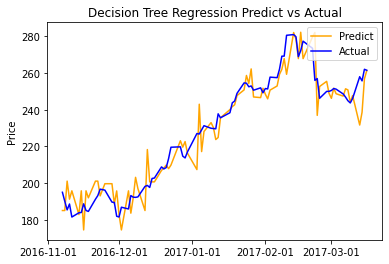

In [416]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=0)

benchmark_dt=dt.fit(X_train, y_train)

validate_result(benchmark_dt, 'Decision Tree Regression')

# Process the data for LSTM

In [357]:
X_train =np.array(X_train)
X_test =np.array(X_test)

X_tr_t = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_tst_t = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Model building : LSTM

In [358]:
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.models import load_model
from keras.layers import LSTM
K.clear_session()
model_lstm = Sequential()
model_lstm.add(LSTM(16, input_shape=(1, X_train.shape[1]), activation='relu', return_sequences=False))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=5, verbose=1)
history_model_lstm = model_lstm.fit(X_tr_t, y_train, epochs=200, batch_size=8, verbose=1, shuffle=False, callbacks=[early_stop])

Epoch 1/200
183/183 [==============================] - 1s 2ms/step - loss: 22703.1211
Epoch 2/200
183/183 [==============================] - 0s 2ms/step - loss: 22523.4668
Epoch 3/200
183/183 [==============================] - 0s 2ms/step - loss: 22194.2891
Epoch 4/200
183/183 [==============================] - 0s 2ms/step - loss: 21714.8926
Epoch 5/200
183/183 [==============================] - 0s 2ms/step - loss: 21119.1523
Epoch 6/200
183/183 [==============================] - 0s 2ms/step - loss: 20435.5957
Epoch 7/200
183/183 [==============================] - 0s 2ms/step - loss: 19683.6211
Epoch 8/200
183/183 [==============================] - 0s 2ms/step - loss: 18877.3633
Epoch 9/200
183/183 [==============================] - 0s 2ms/step - loss: 18028.3574
Epoch 10/200
183/183 [==============================] - 0s 2ms/step - loss: 17146.7598
Epoch 11/200
183/183 [==============================] - 0s 2ms/step - loss: 16241.8467
Epoch 12/200
183/183 [==============================

# Evaluation of Model

In [359]:
y_pred_test_lstm = model_lstm.predict(X_tst_t)
y_train_pred_lstm = model_lstm.predict(X_tr_t)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_lstm)))
r2_train = r2_score(y_train, y_train_pred_lstm)

print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test_lstm)))
r2_test = r2_score(y_test, y_pred_test_lstm)


The R2 score on the Train set is:	0.997
The R2 score on the Test set is:	0.878


## Predictions made by LSTM

In [360]:
score_lstm= model_lstm.evaluate(X_tst_t, y_test, batch_size=1)

145/145 [==============================] - 0s 997us/step - loss: 29.4188


In [392]:
print('LSTM Score: %f'%score_lstm)

LSTM Score: 29.418791


In [363]:
y_pred_test_LSTM = model_lstm.predict(X_tst_t)

# LSTM's Prediction Visual

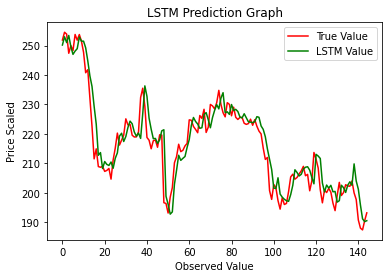

In [400]:
plt.plot(y_test,color='red', label='True Value')
plt.plot(y_pred_test_LSTM, color='green', label='LSTM Value')
plt.title("LSTM Prediction Graph")
plt.xlabel('Observed Value')
plt.ylabel('Price Scaled')
plt.legend()
plt.show()
